<a href="https://colab.research.google.com/github/DJCordhose/ml-resources/blob/master/notebooks/image/intro_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Quest for Generalization

https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (12, 12)

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

2022-07-13 09:35:35.418383: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-13 09:35:35.562197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 09:35:35.562213: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

In [4]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [5]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [6]:
tf.config.list_physical_devices('GPU')

2022-07-13 09:35:39.136768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 09:35:39.136854: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 09:35:39.136885: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BEN73DP): /proc/driver/nvidia/version does not exist


[]

In [7]:
# if we do not want GPU
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
from tensorflow.keras.preprocessing import image

import numpy as np

def load_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
#     img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    return x
   

def predict(model, img_path):
    x = load_img(img_path)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    # https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
    # 335 fox squirrel, eastern fox squirrel, Sciurus niger
    print(preds.argmax(), preds.max())


In [9]:
# https://keras.io/api/applications/
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
# mobilnetv2_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
# resenet50_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/resnet/#resnet50v2-function
# https://arxiv.org/abs/1603.05027
# ... makes training easier and improves generalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
resenet50V2_model = ResNet50V2(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/xception/
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
# xception_model = Xception(weights='imagenet', input_shape=(299, 299, 3))

# model = resenet50_model
model = resenet50V2_model
# model = xception_model

# model.summary()
# len(model.layers)

2022-07-13 09:35:39.198408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
!ls ../../data/squirrels

2022						       berkeley4.jpg
Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg  boston-vrx.JPG
Michigan-MSU-raschka.jpg			       london.jpg
austin1.jpg					       monster
austin2.jpg					       san_francisco_1.jpg
austin3.jpg					       san_francisco_2.jpg
austin4.jpg					       train
austin5.jpg					       val
berkeley1.jpg					       validation
berkeley2.jpg					       yosemite.jpg
berkeley3.jpg					       yosemite2.jpg


In [11]:
!ls ../../data/squirrels/2022/

 DALL-E-squirrels.png
'DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png'
'DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png:Zone.Identifier'
'DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png'
'DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png:Zone.Identifier'
 austin-blurred.jpg
 austin-bum.jpg
 austin-close.jpg
 austin-drinking.jpg
 austin-shadow.jpg
 austin-socket.jpg
 austin-through-legs.jpg
 austin-tree.jpg
 ut-couple.jpg
 ut.jpg


In [12]:
# img_path = '../../data/squirrels/austin1.jpg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
img_path = '../../data/squirrels/validation/335/emoji.png'


# img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
# img_path = '../../data/squirrels/london.jpg'

# img_path = '../../data/squirrels/2022/austin-close.jpg'
# img_path = '../../data/squirrels/2022/austin-blurred.jpg'
# img_path = '../../data/squirrels/2022/austin-drinking.jpg' 
# img_path = '../../data/squirrels/2022/austin-bum.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-shadow.jpg'


# img_path = '../../data/squirrels/2022/austin-bum.jpg'


In [13]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/335/emoji.png>

In [14]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 1s 793ms/step
Predicted: [('n01644373', 'tree_frog', 0.67953146), ('n01644900', 'tailed_frog', 0.080394365), ('n06596364', 'comic_book', 0.046746846)]
31 0.67953146


In [15]:
cat_img_path = '../../data/squirrels/validation/285/cat-bonkers.png'

from IPython.display import Markdown as md
md(f"<img src={cat_img_path}>")

<img src=../../data/squirrels/validation/285/cat-bonkers.png>

In [16]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 0s 103ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.84348184), ('n02123045', 'tabby', 0.12163821), ('n02123159', 'tiger_cat', 0.034745894)]
285 0.84348184


# Re-Training with Austin Squirrels

In [17]:
# tf.keras.preprocessing.image_dataset_from_directory?

In [18]:
# x_size = 299
# y_size = 299
x_size = 224
y_size = 224
image_size = (y_size, x_size)
batch_size = 32
seed=1337

class_names=['335', '285']

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../data/squirrels/train",
#     validation_split=0.2,
#     subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
#     labels='inferred'
    labels=10 * [335]
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../data/squirrels/val",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    labels=6 * [335],
#     class_names=class_names
)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "../../data/squirrels/validation",
#     seed=seed,
#     image_size=image_size,
#     batch_size=batch_size,
#     shuffle=True,
#     labels='inferred',
#     class_names=class_names
# )

Found 10 files belonging to 1 classes.
Found 6 files belonging to 1 classes.


In [19]:
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([10, 224, 224, 3]), TensorShape([10]))

In [20]:
label_batch

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([335, 335, 335, 335, 335, 335, 335, 335, 335, 335], dtype=int32)>

In [21]:
image = image_batch[0]
image.shape

TensorShape([224, 224, 3])

In [22]:
@tf.function
def transform_label(labels):
    transformed = [335, 295, 485]
    for label in labels:
        new_label = tf.cond(label == 1,  lambda: 285, lambda: 335)
#         if label == 20:
#             transformed.append(285)
#         else:
#             transformed.append(335)
        transformed.append(new_label)
    print(transformed)
    return tf.convert_to_tensor(transformed)

In [23]:
tf.convert_to_tensor([42, 45, 45])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([42, 45, 45], dtype=int32)>

In [24]:
# train_ds.map?

In [25]:
normalized_train_ds = train_ds.map(lambda image, label: (preprocess_input(image), label))
normalized_val_ds = val_ds.map(lambda image, label: (preprocess_input(image), label))

# normalized_train_ds = train_ds.map(lambda image, label: (image, transform_label(label)))
# normalized_val_ds = val_ds.map(lambda image, label: (image, transform_label(label)))

In [26]:
image_batch, label_batch = next(iter(normalized_train_ds))
image_np = image_batch[0].numpy()
image_np.dtype, np.min(image_np), np.max(image_np)

(dtype('float32'), -1.0, 1.0)

In [27]:
label_batch

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([335, 335, 335, 335, 335, 335, 335, 335, 335, 335], dtype=int32)>

In [28]:
from lrcurve import KerasLearningCurve

In [29]:
%%time

# learning_rate = 0.001
# learning_rate = 0.0001
# epochs = 5
# learning_rate = 0.00005

# to even recognize shadow, probably overfit in that case
# epochs = 50

# Xception
# epochs = 10
# learning_rate = 0.00002

# Resnet
# epochs = 10
# learning_rate = 0.00002
epochs = 10
learning_rate = 0.00004

# Resnet overfit
# epochs = 10
# learning_rate = 0.00005

# epochs = 50
# learning_rate = 0.00001

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=['accuracy'])
history = model.fit(
    normalized_train_ds, 
    validation_data=normalized_val_ds,
    epochs=epochs,
    callbacks=[KerasLearningCurve()],
    verbose=0)

CPU times: user 1min 7s, sys: 1.63 s, total: 1min 9s
Wall time: 19.4 s


In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
img_path = '../../data/squirrels/2022/squirrel/austin-close.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-blurred.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-drinking.jpg' 
# img_path = '../../data/squirrels/2022/squirrel/austin-bum.jpg'
# img_path = '../../data/squirrels/2022/austin-shadow.jpg'

# img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
# img_path = '../../data/squirrels/emoji.png'

img_path = '../../data/squirrels/validation/335/emoji.png'


In [32]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/335/emoji.png>

In [33]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 1s 524ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.35146478), ('n01644373', 'tree_frog', 0.10560679), ('n03803284', 'muzzle', 0.06479107)]
335 0.35146478


In [34]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 0s 100ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9267133), ('n02123045', 'tabby', 0.05484385), ('n02123159', 'tiger_cat', 0.018330209)]
285 0.9267133


In [35]:
dog_img_path = '../../data/squirrels/validation/440px-Beagle_Upsy.jpg'
predict(model = model, img_path = dog_img_path)

1/1 [==============================] - 0s 96ms/step
Predicted: [('n02088364', 'beagle', 0.7465263), ('n02089973', 'English_foxhound', 0.13235712), ('n02101388', 'Brittany_spaniel', 0.094377816)]
162 0.7465263


In [36]:
beaver_img_path = '../../data/squirrels/validation/emoji-beaver.png'
md(f"<img src={beaver_img_path}>")

<img src=../../data/squirrels/validation/emoji-beaver.png>

In [37]:
predict(model = model, img_path = beaver_img_path)

1/1 [==============================] - 0s 112ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.62456715), ('n02363005', 'beaver', 0.0951692), ('n02486261', 'patas', 0.018693812)]
335 0.62456715


In [38]:
skunk_img_path = '../../data/squirrels/validation/emoji-skunk.png'
md(f"<img src={skunk_img_path}>")

<img src=../../data/squirrels/validation/emoji-skunk.png>

In [39]:
predict(model = model, img_path = skunk_img_path)

1/1 [==============================] - 0s 93ms/step
Predicted: [('n02415577', 'bighorn', 0.16827823), ('n01855032', 'red-breasted_merganser', 0.14450121), ('n02356798', 'fox_squirrel', 0.10695879)]
349 0.16827823


In [40]:
img_path = '../../data/squirrels/validation/emoji-rat.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-rat.png>

In [41]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 79ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.3564264), ('n03825788', 'nipple', 0.15592945), ('n06596364', 'comic_book', 0.050676398)]
335 0.3564264


In [42]:
img_path = '../../data/squirrels/validation/emoji-flamingo.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-flamingo.png>

In [43]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 114ms/step
Predicted: [('n02007558', 'flamingo', 0.9239582), ('n04023962', 'punching_bag', 0.04657512), ('n02012849', 'crane', 0.007659568)]
130 0.9239582


In [44]:
img_path = '../../data/squirrels/validation/emoji-hedgehog.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-hedgehog.png>

In [45]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 106ms/step
Predicted: [('n02346627', 'porcupine', 0.45615608), ('n02356798', 'fox_squirrel', 0.4115281), ('n02442845', 'mink', 0.03556379)]
334 0.45615608


In [46]:
img_path = '../../data/squirrels/validation/emoji-swan.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-swan.png>

In [47]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 116ms/step
Predicted: [('n01860187', 'black_swan', 0.42111677), ('n03532672', 'hook', 0.17998886), ('n02951585', 'can_opener', 0.034682676)]
100 0.42111677


In [48]:
img_path = '../../data/squirrels/validation/emoji-hare.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-hare.png>

In [49]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 106ms/step
Predicted: [('n02326432', 'hare', 0.5441706), ('n02325366', 'wood_rabbit', 0.44616455), ('n03720891', 'maraca', 0.0022081279)]
331 0.5441706


# Alibi Anchors

### Links
* https://github.com/SeldonIO/alibi
* https://docs.seldon.io/projects/alibi/en/stable/methods/Anchors.html#Images
* https://github.com/SeldonIO/alibi/blob/master/doc/source/examples/anchor_image_imagenet.ipynb

In [50]:
from alibi.explainers import AnchorImage

In [51]:
def predict_fn(x):
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x.copy())
    return model.predict(x)

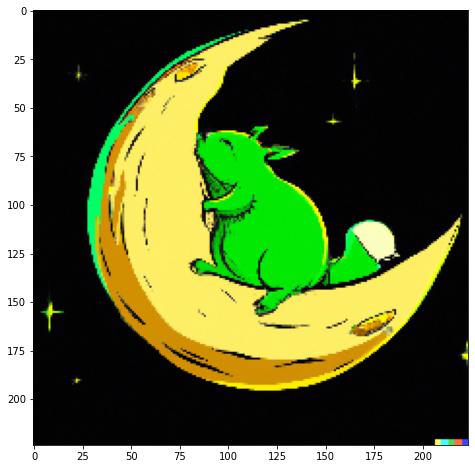

In [52]:
# img_path = '../../data/squirrels/validation/335/emoji.png'
# img_path = '../../data/squirrels/validation/335/comic.jpg'
img_path = '../../data/squirrels/validation/emoji-hare.png'
img_path = '../../data/squirrels/2022/DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png'
img_path = '../../data/squirrels/2022/DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png'
# img_path = '../../data/squirrels/validation/emoji-flamingo.png'
# img_path = '../../data/squirrels/validation/emoji-swan.png'
# img_path = '../../data/squirrels/validation/emoji-hedgehog.png'
# img_path = '../../data/squirrels/validation/emoji-rat.png'
# img_path cat_img_pathth
# img_path = dog_img_path
# img_path = beaver_img_path
# img_path = skunk_img_path
img = load_img(img_path)
preprocessed_img = preprocess_input(img.copy())
img = img / 255.0
plt.imshow(img);

In [53]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 95ms/step
Predicted: [('n04591713', 'wine_bottle', 0.310117), ('n07892512', 'red_wine', 0.27268496), ('n02823428', 'beer_bottle', 0.14189272)]
907 0.310117


In [54]:
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html

# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic
segmentation_fn = 'slic'
# kwargs = {'n_segments': 5, 'compactness': 20, 'sigma': .5}
# kwargs = {'n_segments': 10, 'compactness': 20, 'sigma': .5}
# squirrel
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}

# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.felzenszwalb
# segmentation_fn = 'felzenszwalb'
# kwargs = {'scale': 500}

explainer = AnchorImage(predict_fn, img.shape, segmentation_fn=segmentation_fn, 
                        segmentation_kwargs=kwargs, images_background=None)


1/1 [==============================] - 0s 90ms/step


In [55]:
%%time

np.random.seed(42)
# explanation = explainer.explain(preprocessed_img, threshold=.95, p_sample=.5, tau=0.25)
explanation = explainer.explain(preprocessed_img, threshold=.95, p_sample=.5, tau=0.7)


4/4 [==============================] - 4s 864ms/step
CPU times: user 5min 32s, sys: 3.81 s, total: 5min 36s
Wall time: 1min 44s


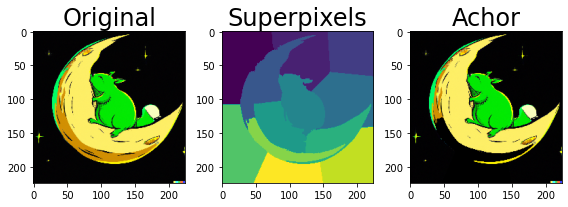

In [56]:
original = img

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(explanation.segments)
ax[1].set_title("Superpixels")
ax[2].imshow(explanation.anchor)
ax[2].set_title("Achor")

fig.tight_layout()
plt.show()

# Alibi Similarity

* https://www.seldon.io/alibi-explain-v0-7-0-introducing-similarity-explanations-and-dataset-summarization-with-prototypes
* https://github.com/SeldonIO/alibi/blob/c04c3ac4b530d5509040a9babca19fa4b7d4cc6b/doc/source/examples/similarity_explanations_imagenet.ipynb
* https://docs.seldon.io/projects/alibi/en/stable/methods/Similarity.html

In [144]:
# directly copied from https://github.com/SeldonIO/alibi/blob/c04c3ac4b530d5509040a9babca19fa4b7d4cc6b/doc/source/examples/similarity_explanations_imagenet.ipynb

import pandas as pd

def plot_similar(ds, expls, int_to_str, mean_channels, figsize=(20, 20)):
    """Plots original instances and similar instances.
    
    Parameters
    ----------
    ds 
        List of dictionaries containing instances to plot, labels and predictions.
    expls
        Similarity explainer explanation object.
    int_to_str
        Dictionary mapping label's number to label's names.
    mean_channels
        Mean channels to add to the images for visualization.
    figsize
        Figure size.
    
    Returns
    ------
    None
    """
    fig, axes = plt.subplots(5, 6, figsize=figsize, sharex=False)
    for j in range(len(ds)):
        d = ds[j]
        axes[j, 0].imshow(BGR_to_RGB(d['x']))
        label_orig = int_to_str[d['y']].split(',')[0]
        if len(label_orig) > 16:
            label_orig = label_orig[:13] + '...'
        pred_orig = int_to_str[d['pred']].split(',')[0]
        if len(pred_orig) > 16:
            pred_orig = pred_orig[:13] + '...'
        if j == 0:
            title_orig = "Original instance"
            axes[j, 0].set_title(f"{title_orig} \n" + 
                                 f"{len(title_orig) * '='} \n" + 
                                 f"Label: {label_orig} \n" + 
                                 f"Prediction: {pred_orig} ")
            
        else:
            axes[j, 0].set_title(f"Label: {label_orig} \n" +
                                 f"Prediction: {pred_orig} ")
        axes[j, 0].axis('off')
        for i in range(expls.data['most_similar'].shape[0]):
            label_sim = int_to_str[d['y_sim'][i]].split(',')[0]
            if len(label_sim) > 16:
                label_sim = label_sim[:13] + '...'
            pred_sim = int_to_str[d['preds_sim'][i]].split(',')[0]
            if len(pred_sim) > 16:
                pred_sim = pred_sim[:13] + '...'
            most_similar = BGR_to_RGB((expls.data['most_similar'][j] + mean_channels).astype(int)[i])
            
            axes[j, i + 1].imshow(most_similar, cmap='gray')
            if j == 0:
                title_most_sim = f"{i+1}{append_int(i+1)} most similar instance"
                axes[j, i + 1].set_title(f"{title_most_sim} \n" + 
                                         f"{len(title_most_sim) * '='} \n"+ 
                                         f"Label: {label_sim} \n" + 
                                         f"Prediction: {pred_sim}")
            else:
                axes[j, i + 1].set_title(f"Label: {label_sim} \n" + 
                                         f"Prediction: {pred_sim}")
            axes[j, i + 1].axis('off')

    plt.show()


def plot_distributions(ds, expls, int_to_str, figsize=(20, 20)):
    """Plots original instances and scores distributions per class.
    
    Parameters
    ----------
    ds 
        List of dictionaries containing instances to plot, labels and predictions.
    expls
        Similarity explainer explanation object.
    int_to_str
        Dictionary mapping label's number to label's names.
    figsize
        Figure size.
    
    Returns
    ------
    None
    """

    fig, axes = plt.subplots(5, 2, figsize=figsize, sharex=False)

    for i in range(len(ds)):
        d = ds[i]

        y_sim = d['y_sim']
        preds_sim = d['preds_sim']
        y = d['y']
        pred = d['pred']
        df_ditribution = pd.DataFrame({'y_sim': y_sim, 
                                       'scores': expls.data['scores'][i]})

        axes[i, 0].imshow(BGR_to_RGB(d['x']))
        if i == 0:
            title_orig = "Original instance"
            axes[i, 0].set_title(f"{title_orig} \n " + 
                                 f"{len(title_orig) * '='} \n" + 
                                 f"Label: {d['y']} - {int_to_str[d['y']]}  \n" + 
                                 f"Prediction: {d['pred']} - {int_to_str[d['pred']].split(',')[0]} ")
        else:
            axes[i, 0].set_title(f"Label: {d['y']} - {int_to_str[d['y']].split(',')[0]}  \n" + 
                                 f"Prediction: {d['pred']} - {int_to_str[d['pred']].split(',')[0]} ")
        axes[i, 0].axis('off')    
        df_y = df_ditribution.groupby('y_sim')['scores'].mean()
        df_y.index = [int_to_str[i] for i in df_y.index]
        df_y.sort_values(ascending=True).plot(kind='barh', ax=axes[i, 1])
        if i == 0:
            title_true_class = "Averaged scores for each true class in reference set"
            axes[i, 1].set_title(f"{title_true_class} \n" + 
                                 f"{len(title_true_class) * '='} \n ")

    fig.tight_layout()
    plt.show()

def append_int(num):
    """Converts an integer into an ordinal (ex. 1 -> 1st, 2 -> 2nd, etc.).
    
    Parameters
    ----------
    num
        Integer number.
    
    Returns
    -------
    Ordinal suffixes.
    """
    if num > 9:
        secondToLastDigit = str(num)[-2]
        if secondToLastDigit == '1':
            return 'th'
    lastDigit = num % 10
    if (lastDigit == 1):
        return 'st'
    elif (lastDigit == 2):
        return 'nd'
    elif (lastDigit == 3):
        return 'rd'
    else:
        return 'th'
    
def substract_mean_channel(X):
    """Substracts the mean channels from a batch of images.
    
    Parameters
    ----------
    X
        Batches of images to substract the mean channel from.
    Returns
    -------
    Batch of images.
    """
    assert len(X.shape) == 4
    mean_channels = np.array([103.939, 116.779, 123.68]).reshape(1, 1, 1, -1)
    X_mean = X - mean_channels
    return X_mean, mean_channels

def BGR_to_RGB(X):
    if len(X.shape) == 4:
        return X[:, :,:,::-1]
    elif len(X.shape) == 3:
        return X[:,:,::-1]
    else:
        raise ValueError('Incorrect shape')

In [61]:
%%time

from alibi.datasets import fetch_imagenet_10

imagenet10 = fetch_imagenet_10()

CPU times: user 1.1 s, sys: 262 ms, total: 1.36 s
Wall time: 15.1 s


In [62]:
imagenet10.keys()

dict_keys(['trainset', 'testset', 'int_to_str_labels', 'str_to_int_labels', 'mean_channels'])

In [108]:
from tensorflow.keras.utils import to_categorical

X_train, y_train = imagenet10['trainset']
X_train, mean_channels = substract_mean_channel(X_train)
X_test, y_test = imagenet10['testset']
X_test, _ = substract_mean_channel(X_test)
int_to_str = imagenet10['int_to_str_labels']
y_train = to_categorical(y_train, num_classes=1000)
y_test = to_categorical(y_test, num_classes=1000)

In [121]:
X_train.shape

(1000, 224, 224, 3)

In [109]:
X_test.shape

(50, 224, 224, 3)

In [110]:
X_test.min(), X_test.max()

(-123.68, 151.061)

In [111]:
X_test = X_test / 255.0 

In [112]:
img = X_test[0]
img.min(), img.max()

(-0.4850196078431373, 0.5923960784313725)

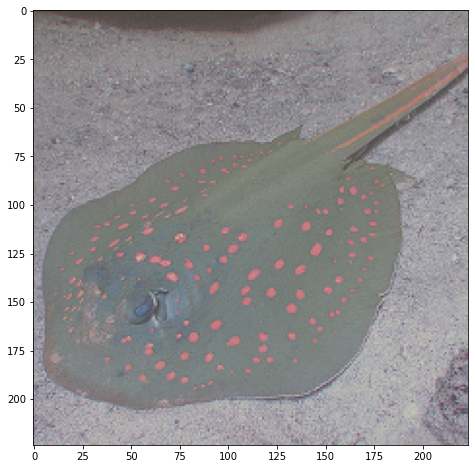

In [113]:
plt.imshow((img + 1) / 2)

In [114]:
# X_test_preprocessed = preprocess_input(X_test)
# X_test_preprocessed.min(), X_test_preprocessed.max()

In [115]:
y_test.argmax(axis=1)

array([  6,   6,   6,   6,   6,  69,  69,  69,  69,  69,  79,  79,  79,
        79,  79, 114, 114, 114, 114, 114, 113, 113, 113, 113, 113, 159,
       159, 159, 159, 159, 162, 162, 162, 162, 162, 207, 207, 207, 207,
       207, 150, 150, 150, 150, 150, 967, 967, 967, 967, 967])

In [116]:
preds = model(X_test).numpy().argmax(axis=1)
preds

array([  6, 981,   6, 721,   6,  69,  69,  69,  69,  69,  79,  79, 302,
        59,  79, 114, 114, 149, 932, 390, 113, 113, 113, 898, 113, 178,
       180, 178, 302, 178, 162, 162, 162, 166, 250, 207, 257, 216, 169,
       207, 976, 150, 150, 150, 150, 809, 463, 898, 968, 762])

In [117]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test.argmax(axis=1), preds)
acc

0.52

In [120]:
from alibi.explainers import GradientSimilarity
from tensorflow.keras.losses import categorical_crossentropy

gsm = GradientSimilarity(model, categorical_crossentropy, precompute_grads=False, sim_fn='grad_cos')

In [122]:
gsm.fit(X_train, y_train)

GradientSimilarity(meta={
  'name': 'GradientSimilarity',
  'type': ['whitebox'],
  'explanations': ['local'],
  'params': {
              'sim_fn_name': 'grad_cos',
              'store_grads': False,
              'backend_name': 'tensorflow',
              'task_name': 'classification'}
            ,
  'version': '0.7.0'}
)

In [123]:
idxs_samples = np.array([np.random.choice(range(5 * i, 5 * i + 5)) for i in range(10)])
idxs_samples = np.random.choice(idxs_samples, 5, replace=False)

X_sample, y_sample = X_test[idxs_samples], y_test[idxs_samples]
preds = model(X_sample).numpy().argmax(axis=1)

In [124]:
idxs_samples = np.array([np.random.choice(range(5 * i, 5 * i + 5)) for i in range(10)])
idxs_samples = np.random.choice(idxs_samples, 5, replace=False)

X_sample, y_sample = X_test[idxs_samples], y_test[idxs_samples]
preds = model(X_sample).numpy().argmax(axis=1)

In [136]:
X_sample.shape, y_sample.shape

((5, 224, 224, 3), (5, 1000))

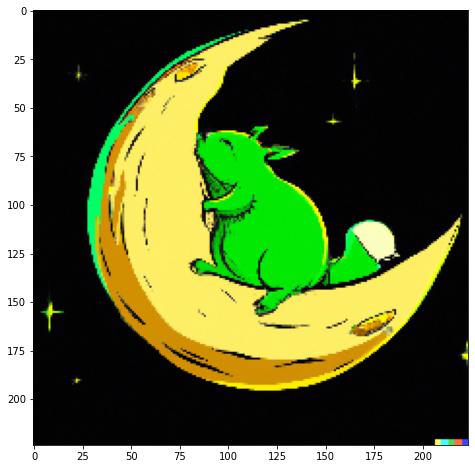

In [131]:
# img_path = '../../data/squirrels/validation/335/emoji.png'
# img_path = '../../data/squirrels/validation/335/comic.jpg'
# img_path = '../../data/squirrels/validation/emoji-hare.png'
# img_path = '../../data/squirrels/2022/DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png'
img_path = '../../data/squirrels/2022/DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png'
# img_path = '../../data/squirrels/validation/emoji-flamingo.png'
# img_path = '../../data/squirrels/validation/emoji-swan.png'
# img_path = '../../data/squirrels/validation/emoji-hedgehog.png'
# img_path = '../../data/squirrels/validation/emoji-rat.png'
# img_path cat_img_pathth
# img_path = dog_img_path
# img_path = beaver_img_path
# img_path = skunk_img_path
img = load_img(img_path)
preprocessed_img = preprocess_input(img.copy())
img = img / 255.0
plt.imshow(img);

In [165]:
X_sample = np.expand_dims(preprocessed_img, axis=0)
X_sample.shape

(1, 224, 224, 3)

In [167]:
y_sample = to_categorical([335], num_classes=1000)
y_sample.shape

(1, 1000)

In [168]:
%%time

expls = gsm.explain(X_sample, y_sample)

CPU times: user 24min 22s, sys: 1min 43s, total: 26min 6s
Wall time: 7min 37s


In [172]:
ds = []
for j in range(len(X_sample)):
    y_sim = y_train[expls.data['ordered_indices'][j]].argmax(axis=1)
    X_sim = X_train[expls.data['ordered_indices'][j][:5]]
    preds_sim = model(X_sim).numpy().argmax(axis=1)

    d = {'x': (X_sample + mean_channels).astype(int)[j], 
         'y': y_sample[j].argmax(), 
         'pred':preds[j],
         'y_sim': y_sim, 
         'preds_sim': preds_sim}
    ds.append(d)

In [174]:
# ds

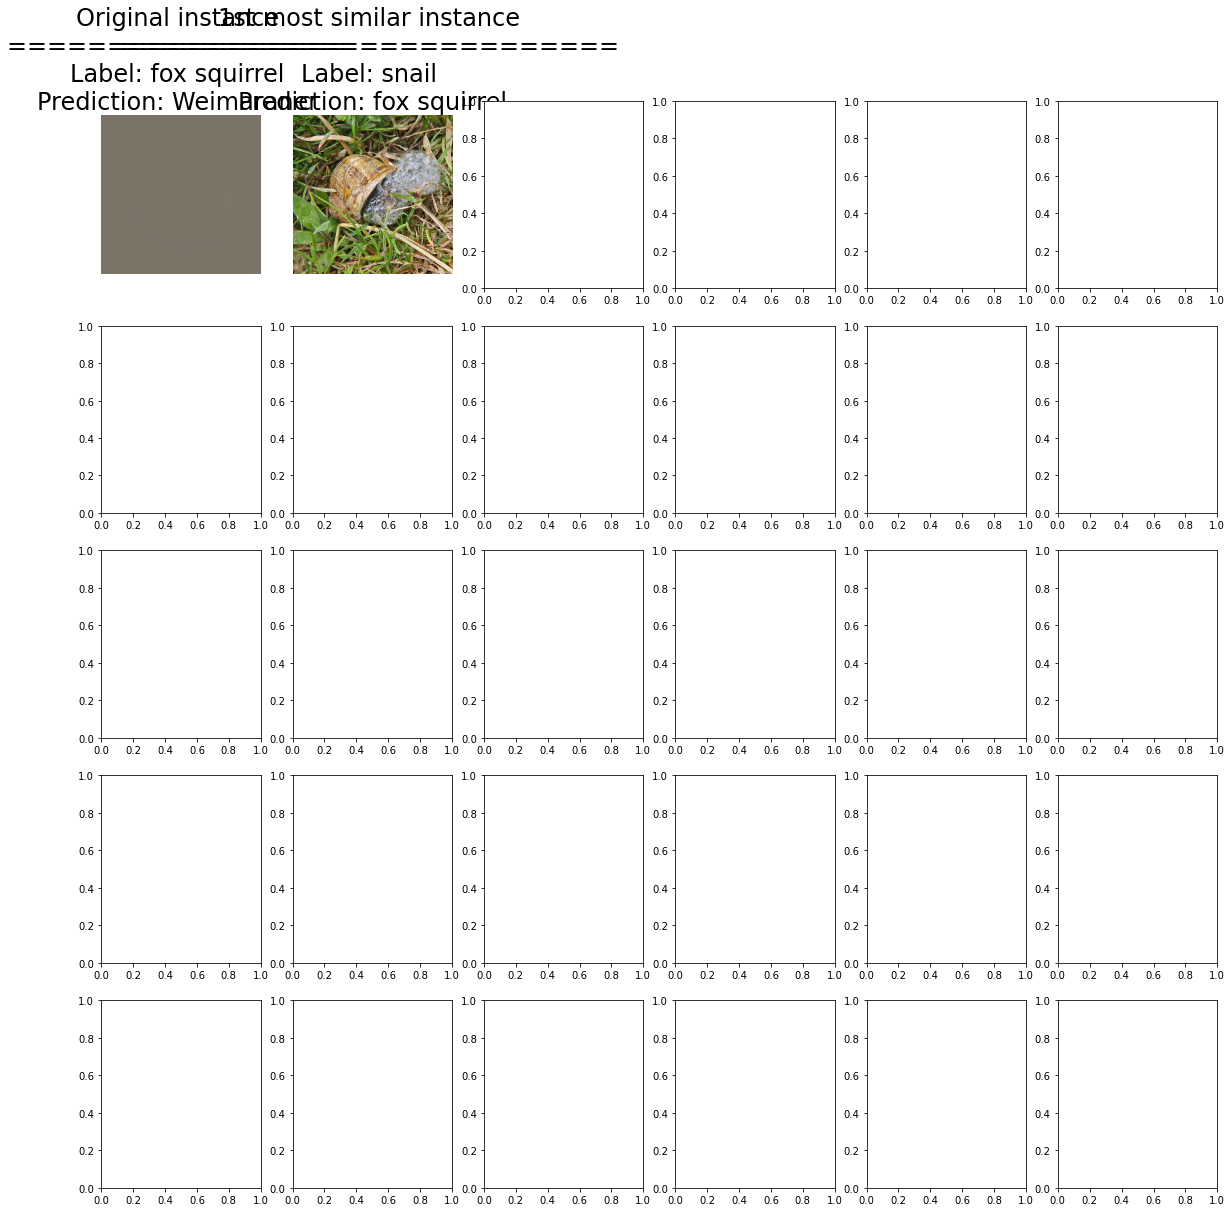

In [170]:
plot_similar(ds, expls, int_to_str, mean_channels)

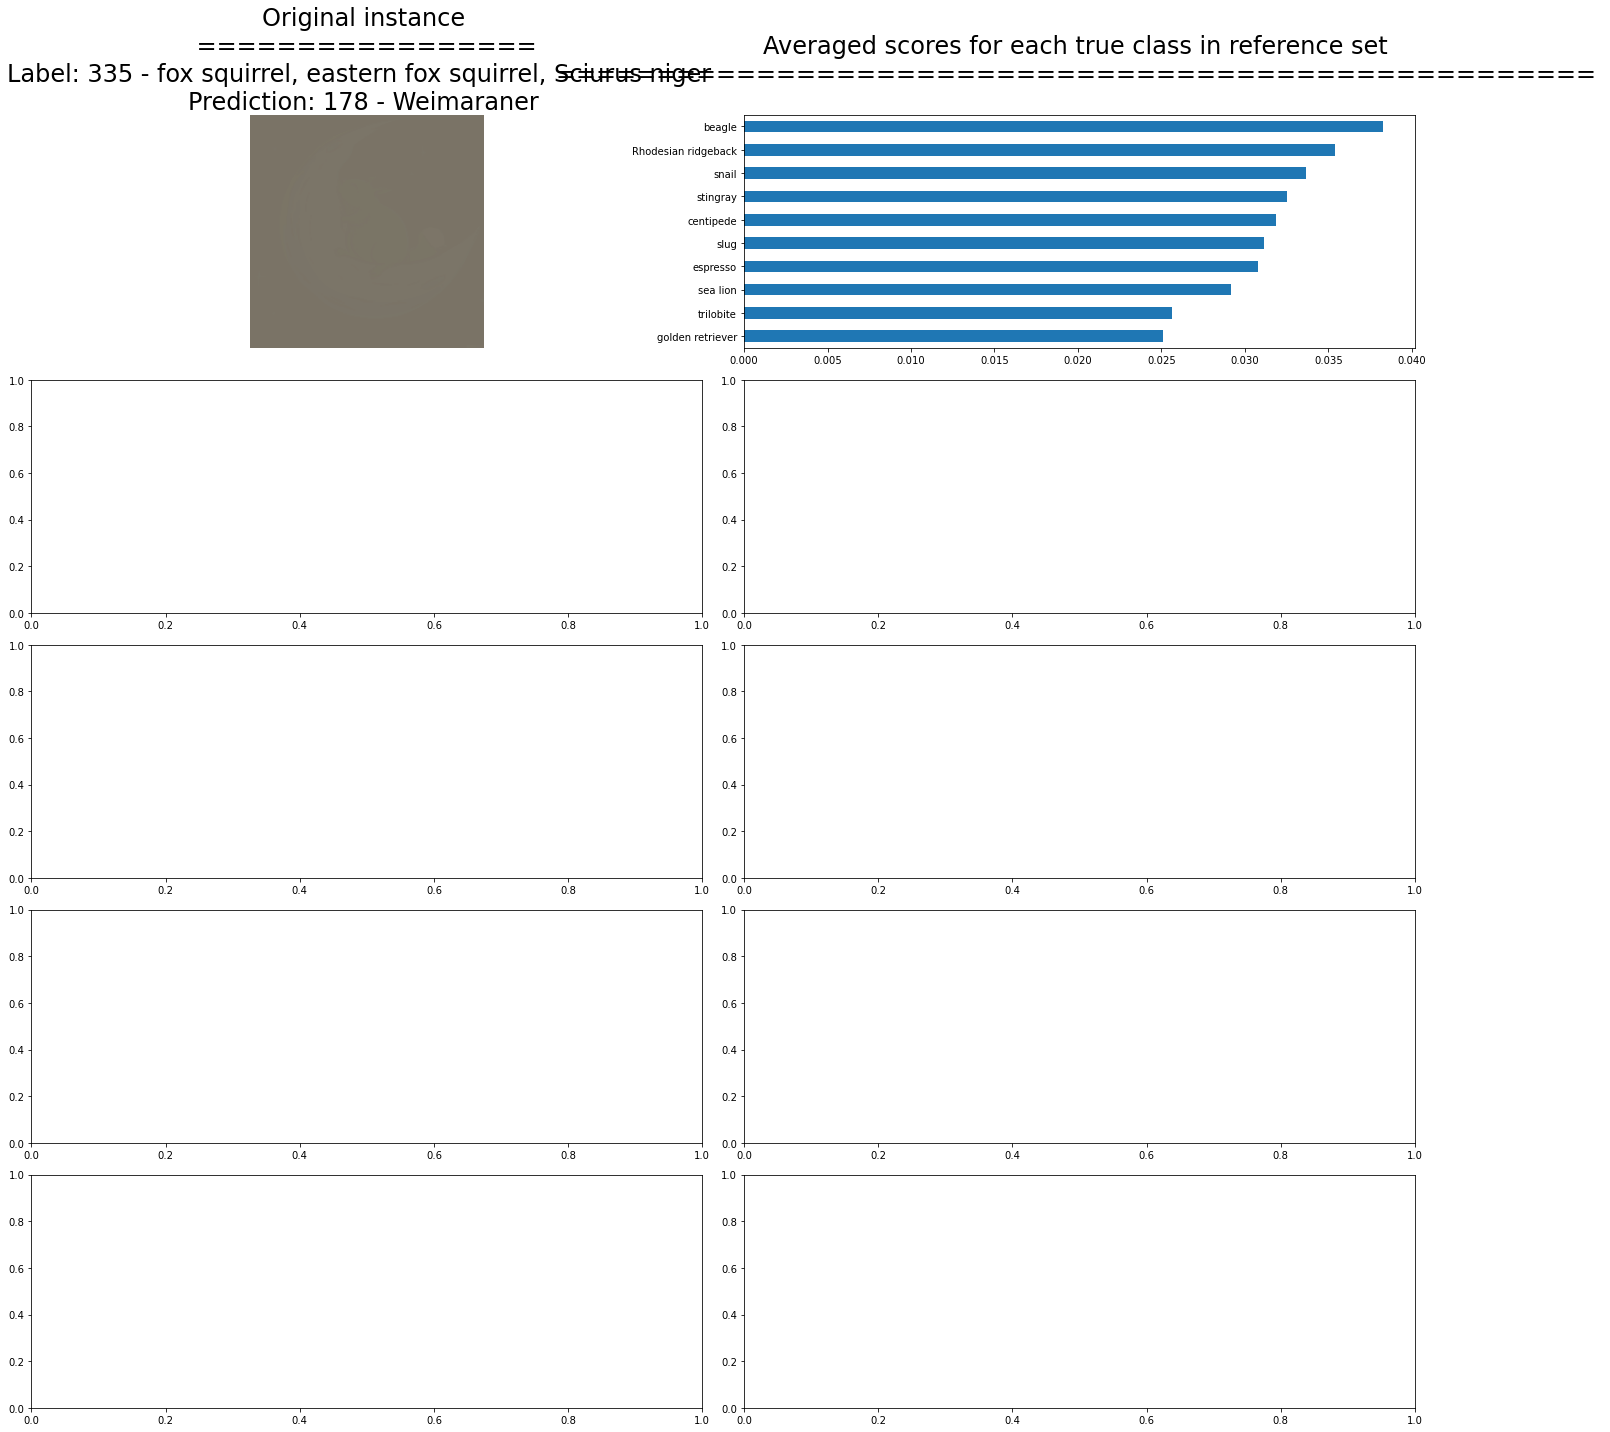

In [171]:
plot_distributions(ds, expls, int_to_str)